In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv('daily_min_temp.csv')

In [4]:
df

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
...,...,...
3645,12/27/1990,14
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7


## 01. Data Cleaning

df.head()

In [6]:
# Display the last few rows of the dataset
df.tail()

,Date,Daily minimum temperatures
3645,12/27/1990,14
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7
3649,12/31/1990,13


In [7]:
# Check for missing values in the dataset
df.isna().sum()

Date                          0
Daily minimum temperatures    0
dtype: int64

In [8]:
# Display basic statistics of the dataset
df.describe()

,Date,Daily minimum temperatures
count,3650,3650
unique,3650,230
top,1/1/1981,11
freq,1,51


In [9]:
# Convert the 'Date' column to a datetime format and create a new 'date' column
df['date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')

# Extract the day, week, month, and year information from the 'date' column
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [10]:
df

,Date,Daily minimum temperatures,date,day,week,month,year
0,1/1/1981,20.7,1981-01-01,1,1,1,1981
1,1/2/1981,17.9,1981-01-02,2,1,1,1981
2,1/3/1981,18.8,1981-01-03,3,1,1,1981
3,1/4/1981,14.6,1981-01-04,4,1,1,1981
4,1/5/1981,15.8,1981-01-05,5,2,1,1981
...,...,...,...,...,...,...,...
3645,12/27/1990,14,1990-12-27,27,52,12,1990
3646,12/28/1990,13.6,1990-12-28,28,52,12,1990
3647,12/29/1990,13.5,1990-12-29,29,52,12,1990
3648,12/30/1990,15.7,1990-12-30,30,52,12,1990


In [11]:
# Rename the column 'Daily minimum temperatures' to 'min_temp'
df = df.rename(columns = {'Daily minimum temperatures':'min_temp'})

In [12]:
df

,Date,min_temp,date,day,week,month,year
0,1/1/1981,20.7,1981-01-01,1,1,1,1981
1,1/2/1981,17.9,1981-01-02,2,1,1,1981
2,1/3/1981,18.8,1981-01-03,3,1,1,1981
3,1/4/1981,14.6,1981-01-04,4,1,1,1981
4,1/5/1981,15.8,1981-01-05,5,2,1,1981
...,...,...,...,...,...,...,...
3645,12/27/1990,14,1990-12-27,27,52,12,1990
3646,12/28/1990,13.6,1990-12-28,28,52,12,1990
3647,12/29/1990,13.5,1990-12-29,29,52,12,1990
3648,12/30/1990,15.7,1990-12-30,30,52,12,1990


In [13]:
# Define a function to get the season based on the month
def get_season(month):
    if month in [12,1,2]:
        return 3
    if month in [3,4,5]:
        return 0
    if month in [6,7,8]:
        return 1
    if month in [9,10,11]:
        return 2
    
# Apply the get_season function to create a new 'season' column
df['season'] = df['month'].apply(get_season)

In [14]:
df

,Date,min_temp,date,day,week,month,year,season
0,1/1/1981,20.7,1981-01-01,1,1,1,1981,3
1,1/2/1981,17.9,1981-01-02,2,1,1,1981,3
2,1/3/1981,18.8,1981-01-03,3,1,1,1981,3
3,1/4/1981,14.6,1981-01-04,4,1,1,1981,3
4,1/5/1981,15.8,1981-01-05,5,2,1,1981,3
...,...,...,...,...,...,...,...,...
3645,12/27/1990,14,1990-12-27,27,52,12,1990,3
3646,12/28/1990,13.6,1990-12-28,28,52,12,1990,3
3647,12/29/1990,13.5,1990-12-29,29,52,12,1990,3
3648,12/30/1990,15.7,1990-12-30,30,52,12,1990,3


In [15]:
df['year'].value_counts()

year
1981    365
1982    365
1983    365
1984    365
1985    365
1986    365
1987    365
1988    365
1989    365
1990    365
Name: count, dtype: int64

In [16]:
df['month'].value_counts()

month
1     310
3     310
5     310
7     310
8     310
10    310
12    308
4     300
6     300
9     300
11    300
2     282
Name: count, dtype: int64

In [17]:
df['day'].value_counts()

day
1     120
2     120
28    120
27    120
26    120
25    120
24    120
23    120
22    120
21    120
20    120
19    120
18    120
17    120
16    120
15    120
14    120
13    120
12    120
11    120
10    120
9     120
8     120
7     120
6     120
5     120
4     120
3     120
29    112
30    110
31     68
Name: count, dtype: int64

In [18]:
df['week'].value_counts()

week
27    70
39    70
29    70
30    70
31    70
32    70
33    70
34    70
35    70
36    70
37    70
38    70
40    70
2     70
41    70
42    70
43    70
44    70
45    70
46    70
47    70
48    70
49    70
50    70
28    70
26    70
14    70
13    70
3     70
4     70
5     70
6     70
7     70
8     70
9     70
10    70
11    70
12    70
51    70
25    70
15    70
16    70
17    70
18    70
19    70
20    70
21    70
22    70
23    70
24    70
52    69
1     67
53    14
Name: count, dtype: Int64

In [19]:
df['min_temp'].unique()

array(['20.7', '17.9', '18.8', '14.6', '15.8', '17.4', '21.8', '20',
       '16.2', '13.3', '16.7', '21.5', '25', '20.6', '24.8', '17.7',
       '15.5', '18.2', '12.1', '14.4', '16', '16.5', '18.7', '19.4',
       '17.2', '15.1', '15.4', '15.3', '21.9', '19.9', '16.6', '16.8',
       '17.1', '15', '13.7', '13.9', '18.3', '22', '22.1', '21.2', '18.4',
       '16.1', '15.7', '18.5', '16.9', '17.5', '17.8', '18.6', '17',
       '14.3', '11.4', '16.3', '11.8', '12.2', '14.7', '11.3', '10.6',
       '11.7', '14.2', '11.2', '8.1', '8', '8.8', '13.4', '10.9', '11',
       '14.5', '18.1', '10', '14.9', '15.9', '13', '7.6', '11.5', '13.5',
       '12.4', '13.2', '13.8', '9', '9.8', '8.9', '7.4', '9.9', '9.3',
       '8.6', '11.9', '14', '12', '10.5', '10.7', '10.1', '5.3', '6.6',
       '8.5', '5.9', '3.2', '2.1', '3.4', '5.4', '9.6', '12.3', '12.6',
       '12.8', '11.6', '5.7', '7.1', '2.5', '3.5', '4.6', '7.7', '10.4',
       '9.2', '6.1', '2.7', '4.3', '6.3', '3.8', '4.4', '4.8', '5.8',
   

In [20]:
# Replace '?' and spaces ' ' in 'min_temp' and convert the column to numeric
df['min_temp'] = df['min_temp'].str.replace('?',' ',regex=False)

In [21]:
df['min_temp'] = pd.to_numeric(df['min_temp'])

In [22]:
df['min_temp'].unique()

array([20.7, 17.9, 18.8, 14.6, 15.8, 17.4, 21.8, 20. , 16.2, 13.3, 16.7,
       21.5, 25. , 20.6, 24.8, 17.7, 15.5, 18.2, 12.1, 14.4, 16. , 16.5,
       18.7, 19.4, 17.2, 15.1, 15.4, 15.3, 21.9, 19.9, 16.6, 16.8, 17.1,
       15. , 13.7, 13.9, 18.3, 22. , 22.1, 21.2, 18.4, 16.1, 15.7, 18.5,
       16.9, 17.5, 17.8, 18.6, 17. , 14.3, 11.4, 16.3, 11.8, 12.2, 14.7,
       11.3, 10.6, 11.7, 14.2, 11.2,  8.1,  8. ,  8.8, 13.4, 10.9, 11. ,
       14.5, 18.1, 10. , 14.9, 15.9, 13. ,  7.6, 11.5, 13.5, 12.4, 13.2,
       13.8,  9. ,  9.8,  8.9,  7.4,  9.9,  9.3,  8.6, 11.9, 14. , 12. ,
       10.5, 10.7, 10.1,  5.3,  6.6,  8.5,  5.9,  3.2,  2.1,  3.4,  5.4,
        9.6, 12.3, 12.6, 12.8, 11.6,  5.7,  7.1,  2.5,  3.5,  4.6,  7.7,
       10.4,  9.2,  6.1,  2.7,  4.3,  6.3,  3.8,  4.4,  4.8,  5.8,  6.2,
        7.3, 10.2,  9.5,  6.5,  7. ,  8.3,  6.8,  7.2,  5. ,  6.9,  5.2,
        3. ,  5.6,  7.9, 10.3,  9.7, 12.5,  3.9,  6. ,  5.5,  7.5,  7.8,
       14.1, 12.9,  9.1,  8.4, 13.6,  9.4, 14.8, 16

## 2. Data Visualization

In [23]:
import seaborn as sns

In [24]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='min_temp', ylabel='Density'>

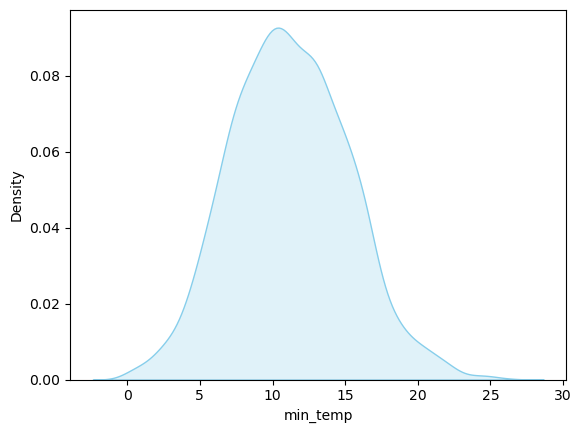

In [25]:
# Data visualization using seaborn and matplotlib
sns.kdeplot(data=df, x='min_temp', fill=True, color='skyblue')

<AxesSubplot:xlabel='min_temp', ylabel='Count'>

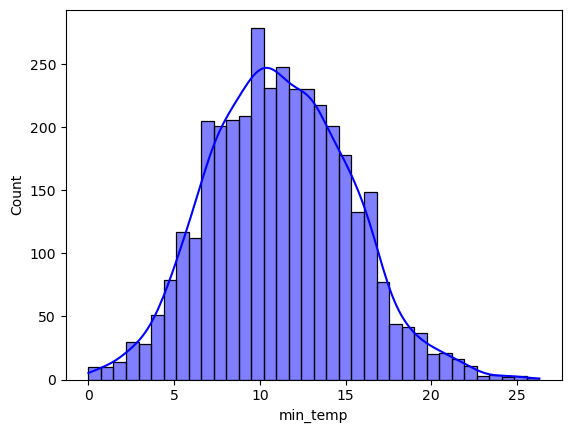

In [26]:
sns.histplot(data=df, x='min_temp', kde=True, color='blue')

In [27]:
df['min_temp'] = pd.to_numeric(df['min_temp'])

<AxesSubplot:xlabel='min_temp'>

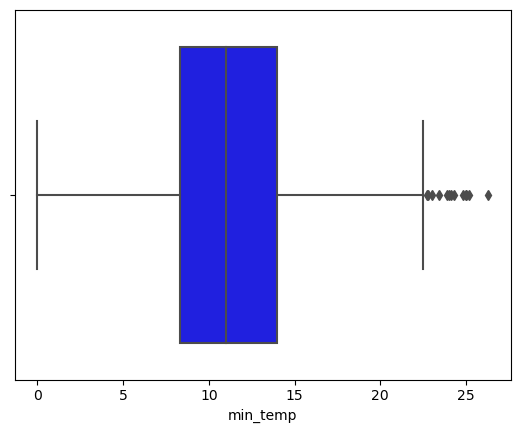

In [28]:
sns.boxplot(
    data = df,
    x = 'min_temp',
    color = 'blue'
)

<AxesSubplot:xlabel='season', ylabel='min_temp'>

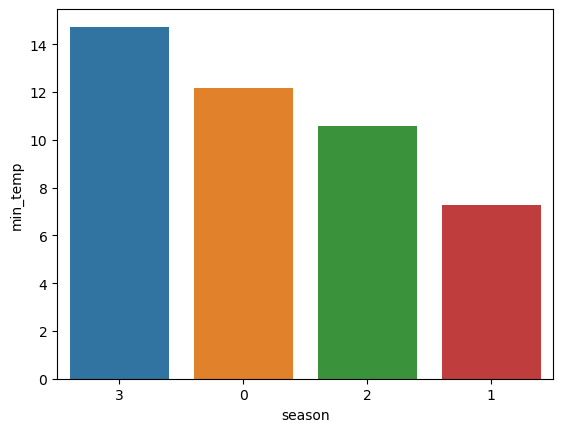

In [29]:
# Barplots to visualize average min_temp across different time intervals
index_season = df.groupby('season')['min_temp'].mean().sort_values(ascending=False).index
sns.barplot(
    data = df,
    x = 'season',
    y = 'min_temp',
    order = index_season,
    errorbar = None,
    estimator=np.mean
)

<AxesSubplot:xlabel='month', ylabel='min_temp'>

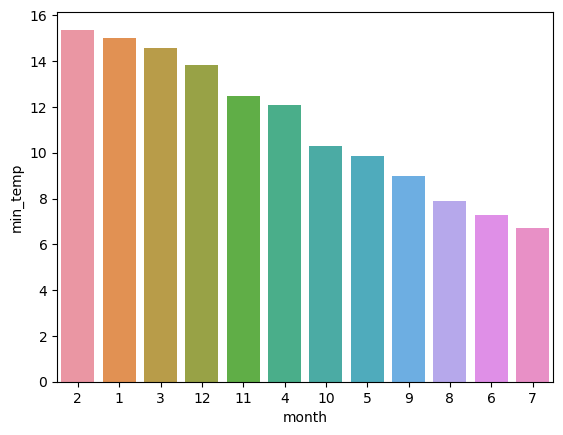

In [30]:
index_month = df.groupby('month')['min_temp'].mean().sort_values(ascending=False).index
sns.barplot(
    data = df,
    x = 'month',
    y = 'min_temp',
    order = index_month,
    errorbar = None,
    estimator=np.mean
)

<AxesSubplot:xlabel='week', ylabel='min_temp'>

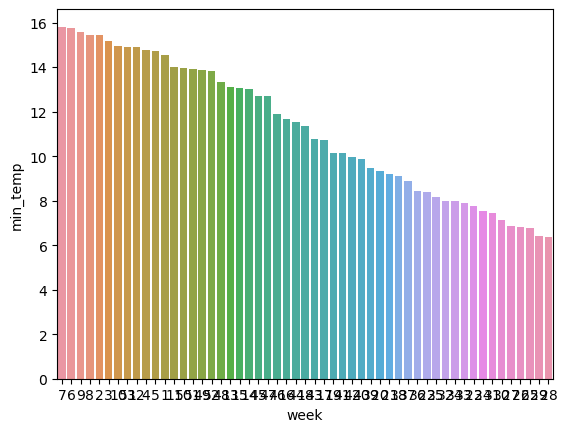

In [31]:
index_week = df.groupby('week')['min_temp'].mean().sort_values(ascending=False).index
sns.barplot(
    data = df,
    x = 'week',
    y = 'min_temp',
    order = index_week,
    errorbar = None,
    estimator=np.mean
)

<AxesSubplot:xlabel='day', ylabel='min_temp'>

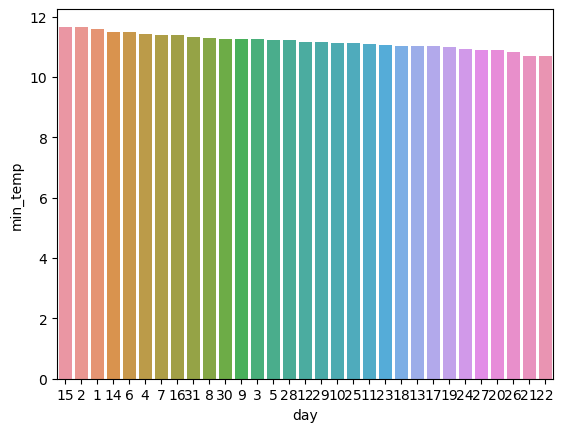

In [32]:
index_day = df.groupby('day')['min_temp'].mean().sort_values(ascending=False).index
sns.barplot(
    data = df,
    x = 'day',
    y = 'min_temp',
    order = index_day,
    errorbar = None,
    estimator=np.mean
)

<AxesSubplot:xlabel='year', ylabel='min_temp'>

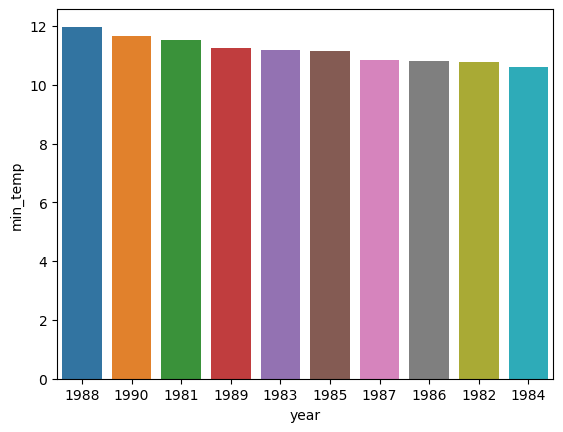

In [33]:
index_year = df.groupby('year')['min_temp'].mean().sort_values(ascending=False).index
sns.barplot(
    data = df,
    x = 'year',
    y = 'min_temp',
    order = index_year,
    errorbar = None,
    estimator=np.mean
)

In [34]:
# Count outliers where min_temp > 20
days_above_20 = df['min_temp'] > 20

# Count the number of True values in the series, which is equivalent to counting the days
count_days_above_20 = days_above_20.sum()

print(count_days_above_20)

74


<AxesSubplot:xlabel='min_temp'>

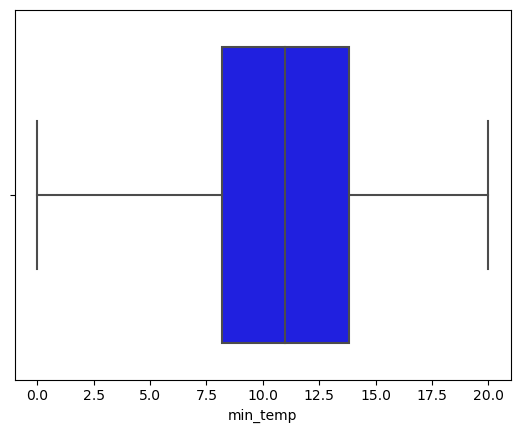

In [35]:
# Remove outliers where min_temp > 20
df = df[df['min_temp'] <= 20]

# Check 
sns.boxplot(
    data = df,
    x = 'min_temp',
    color = 'blue'
)

## 3. ADF Test

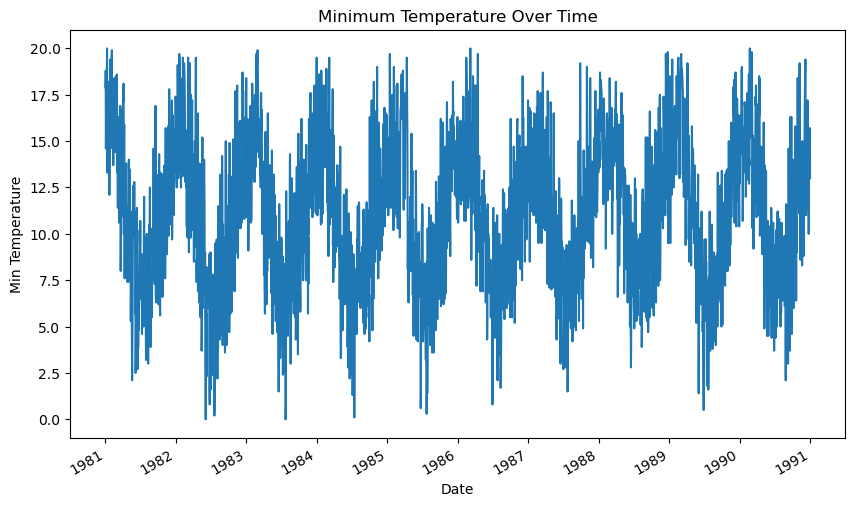

In [37]:
#  Augmented Dickey-Fuller (ADF) test for stationarity. Plotting min_temp over time indexed by date
df.set_index('date', inplace=True)
df['min_temp'].plot(figsize=(10, 6), title='Minimum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Min Temperature')
plt.show()

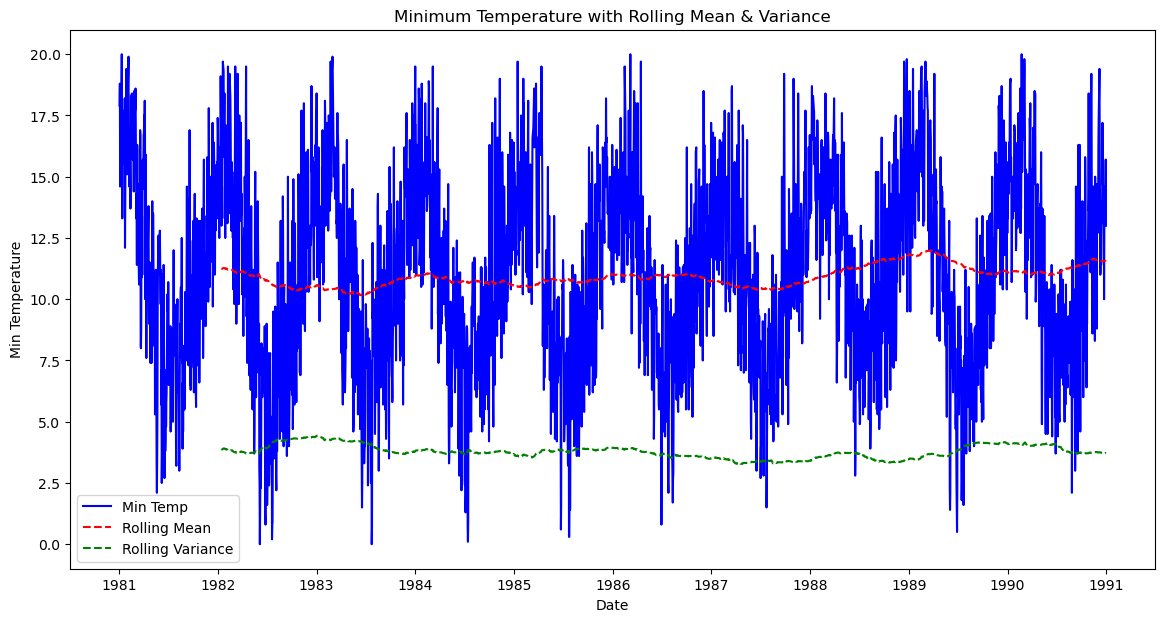

In [38]:
# Calculating rolling mean and variance for ADF test
# Because it is daily data, we can choose the rolling windown = 365
rolling_mean = df['min_temp'].rolling(window=365).mean()
rolling_var = df['min_temp'].rolling(window=365).std()

# Plotting the time series along with the rolling statistics(mean and statistics)
plt.figure(figsize=(14, 7))
plt.plot(df['min_temp'], label='Min Temp', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red', linestyle='--')
plt.plot(rolling_var, label='Rolling Variance', color='green', linestyle='--')
plt.title('Minimum Temperature with Rolling Mean & Variance')
plt.xlabel('Date')
plt.ylabel('Min Temperature')
plt.legend()
plt.show()

In [39]:
# Perform ADF test and check for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['min_temp'].values)
result

(-4.521583317789993,
 0.00017971621234681232,
 17,
 3558,
 {'1%': -3.4321892422972575,
  '5%': -2.8623526737372837,
  '10%': -2.5672025996313876},
 16000.456931808498)

## 4. ACF and PACF Plot

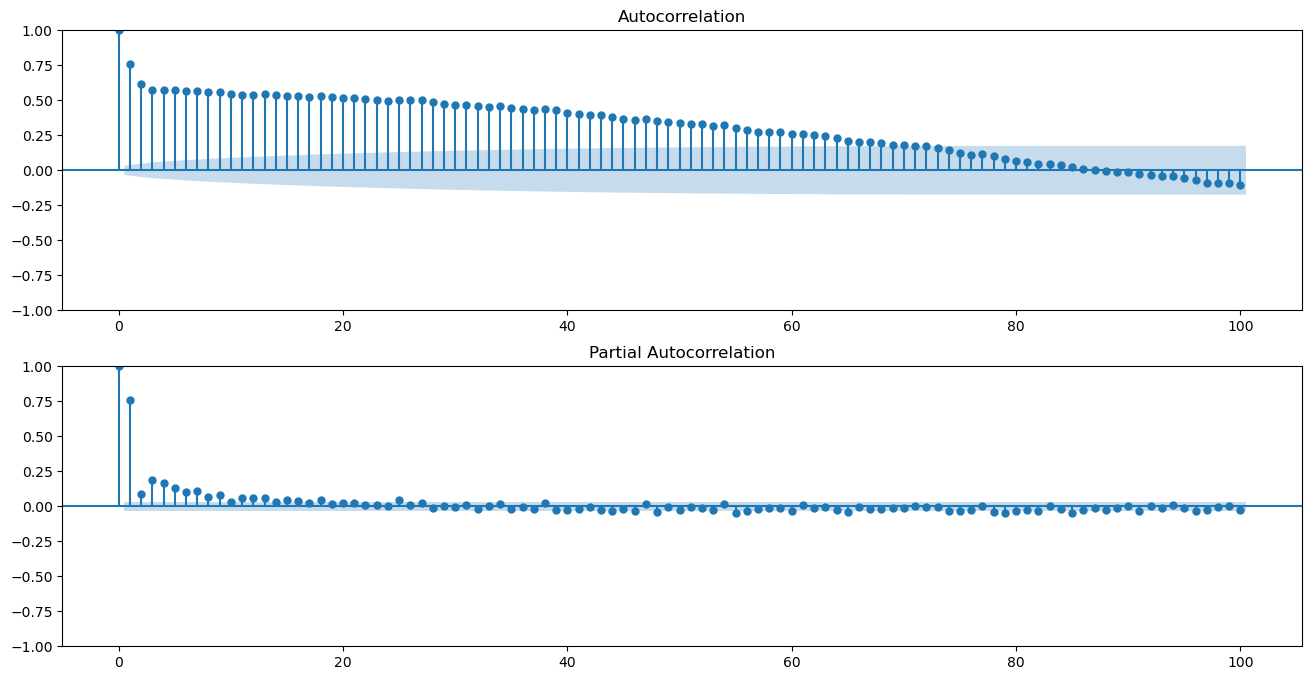

In [40]:
# ACF and PACF plots to determine p and q for ARIMA model
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['min_temp'], lags=100, ax=ax[0])
plot_pacf(df['min_temp'], lags=100, ax=ax[1], method='ywm')

plt.show()

## 5. Time Series Decomposition

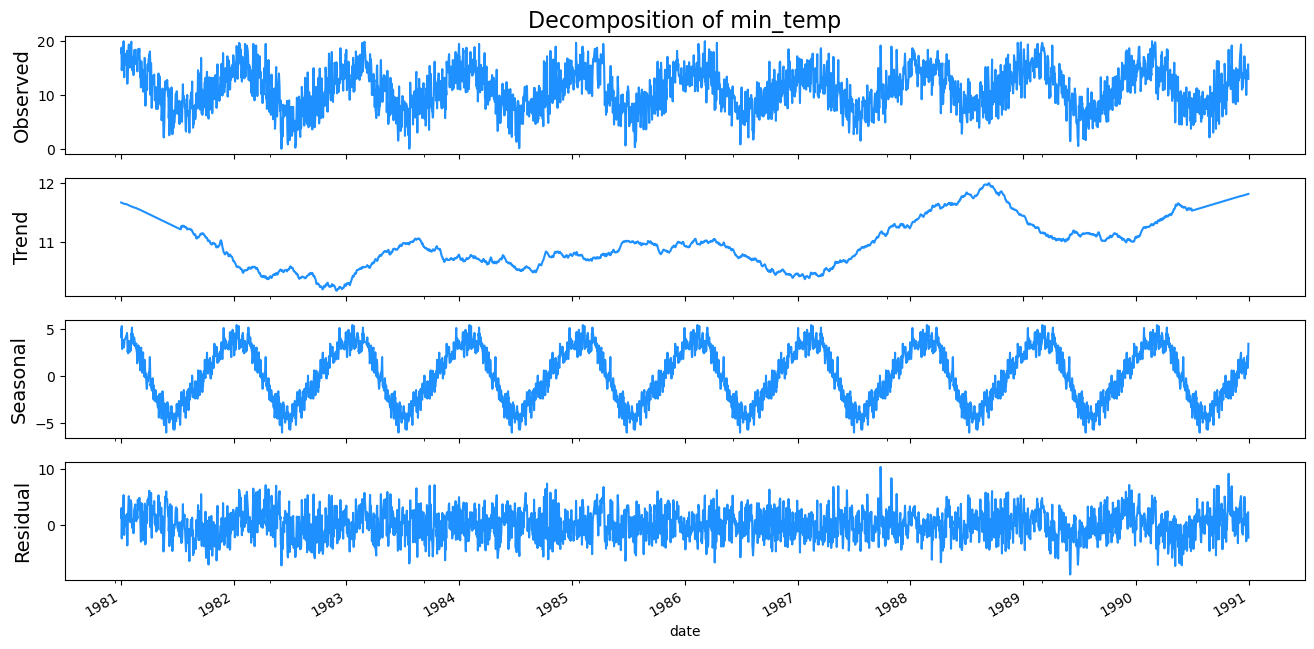

In [41]:
# Time series decomposition into trend, season, and error components
from statsmodels.tsa.seasonal import seasonal_decompose

f, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16,8))
res = seasonal_decompose(df['min_temp'], period = 365, model='additive', extrapolate_trend='freq')

ax[0].set_title('Decomposition of min_temp', fontsize=16)
res.observed.plot(ax=ax[0], legend=False, color='dodgerblue')
ax[0].set_ylabel('Observed', fontsize=14)

res.trend.plot(ax=ax[1], legend=False, color='dodgerblue')
ax[1].set_ylabel('Trend', fontsize=14)

res.seasonal.plot(ax=ax[2], legend=False, color='dodgerblue')
ax[2].set_ylabel('Seasonal', fontsize=14)

res.resid.plot(ax=ax[3], legend=False, color='dodgerblue')
ax[3].set_ylabel('Residual', fontsize=14)

plt.show()

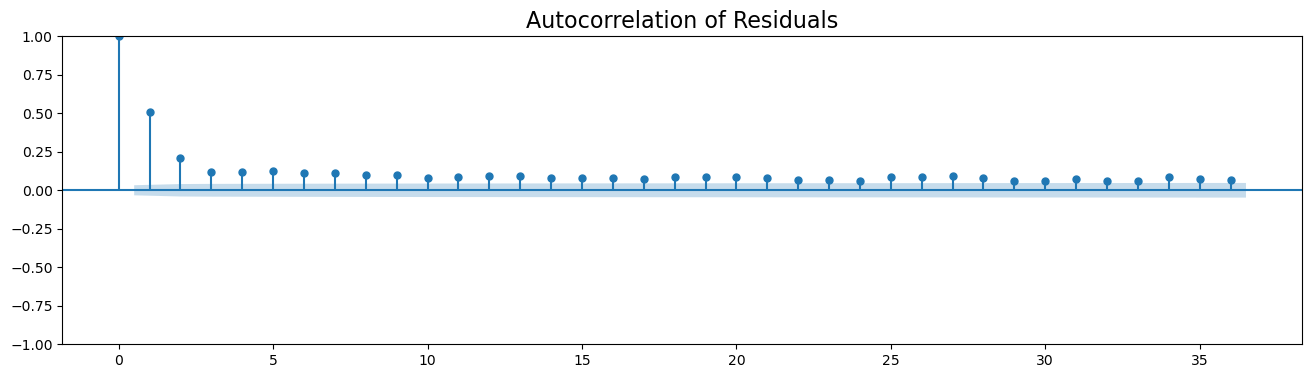

In [42]:
# Plotting the decomposed components
plt.figure(figsize=(16, 4))
plot_acf(res.resid.dropna(), ax=plt.gca())
plt.title('Autocorrelation of Residuals', fontsize=16)
plt.show()

## 6. Non-Seasonal ARIMA

In [43]:
# Splitting the dataset into training and testing sets
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split

train, test = train_test_split(df['min_temp'], test_size=0.2, shuffle=False)

In [44]:
# Auto ARIMA model without seasonality --> Seasnality = False
auto_arima_model = auto_arima(train, 
                              seasonal=False, 
                              trace=True,
                              m = 1,
                              error_action='ignore', 
                              suppress_warnings=True)
# Summary of the fitted model
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=12999.436, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22098.487, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=13720.920, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=19056.006, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=13020.544, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=13030.750, Time=0.51 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.86 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=12998.772, Time=0.70 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=12996.872, Time=0.60 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=16401.158, Time=0.30 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=13000.095, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=17350.298, Time=0.17 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=15849.145, Time=0.43 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=13000.513, Time=1.17 sec
 ARIMA(1,0,3)(0,0,0)[0] i

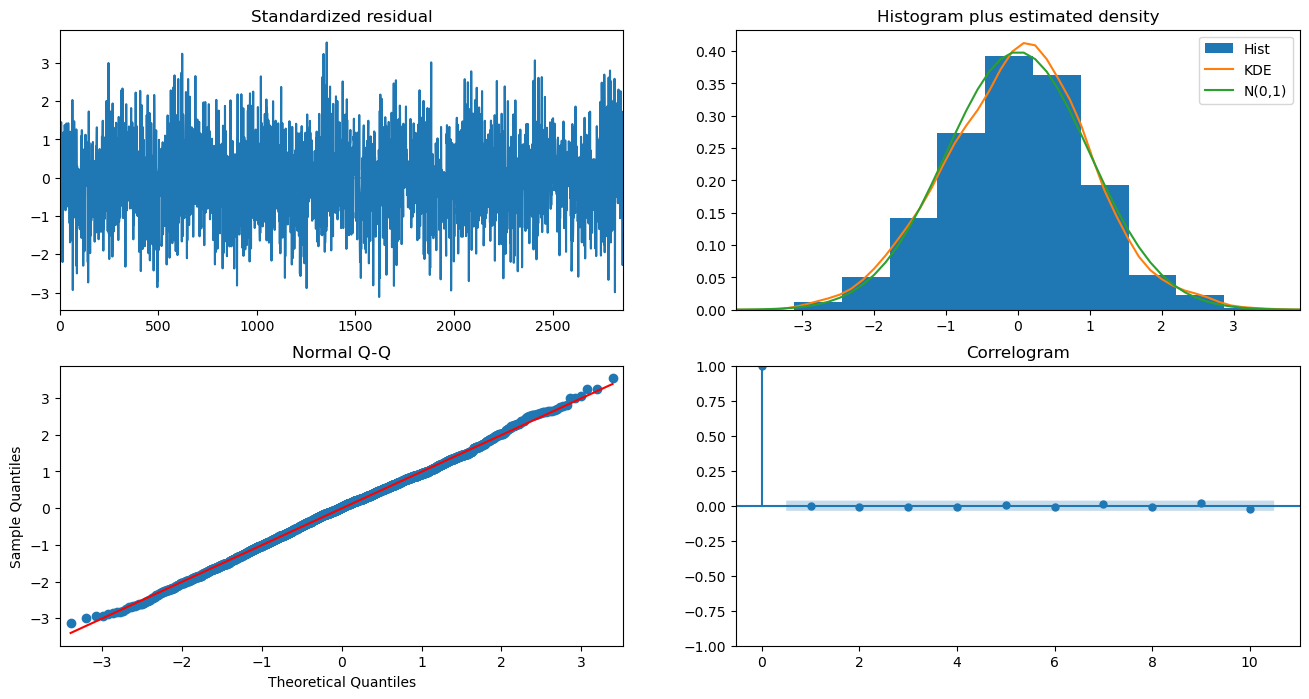

In [45]:
# Plot diagnostics
auto_arima_model.plot_diagnostics(figsize=(16,8))
plt.show()

In [46]:
# Evaluate performance of the ARIMA model on training and test sets
# Make predictions and computing RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
train_predictions = auto_arima_model.predict_in_sample(start=0, end=len(train)-1)

test_predictions = auto_arima_model.predict(n_periods=len(test))

train_rmse = sqrt(mean_squared_error(train, train_predictions))

test_rmse = sqrt(mean_squared_error(test, test_predictions))

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 2.3397799078934614
Testing RMSE: 3.860186726329262


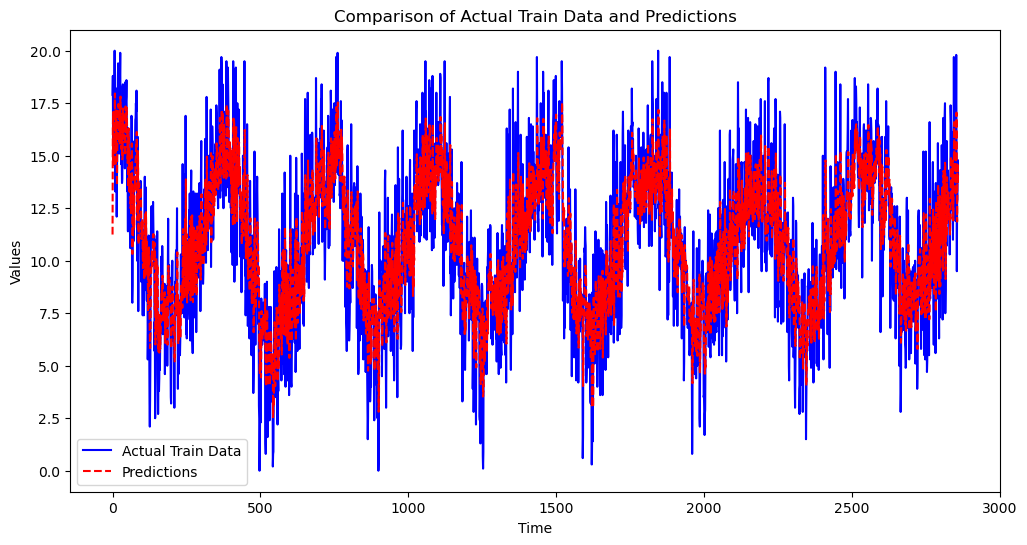

In [47]:
# Plot comparison of actual vs predicted values for training and test sets
# Plotting the prediction for training set
plt.figure(figsize=(12, 6))
plt.plot(train.reset_index(drop=True), label='Actual Train Data', color='blue')
plt.plot(train_predictions.reset_index(drop=True), label='Predictions', color='red', linestyle='--')
plt.title('Comparison of Actual Train Data and Predictions')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

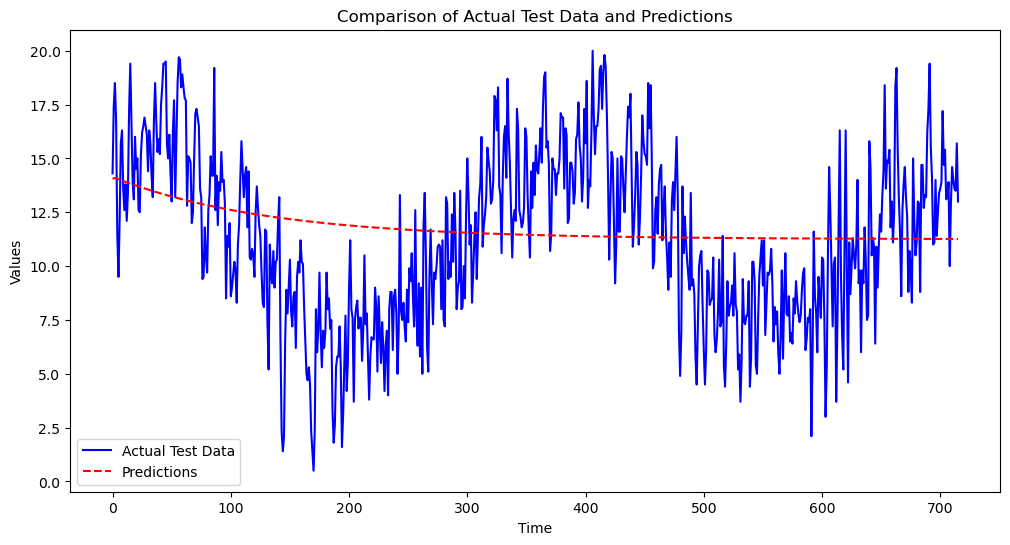

In [48]:
# Plot comparison of actual vs predicted values for training and test sets
# # Plotting the prediction for test set
plt.figure(figsize=(12, 6))
plt.plot(test.reset_index(drop=True), label='Actual Test Data', color='blue')
plt.plot(test_predictions.reset_index(drop=True), label='Predictions', color='red', linestyle='--')
plt.title('Comparison of Actual Test Data and Predictions')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

## 7. Seasonal ARIMA

In [49]:
# Auto ARIMA model without seasonality --> Seasnality = True
s_auto_arima_model = auto_arima(train, 
                              seasonal=True, 
                              trace=True,
                              m = 1,
                              error_action='ignore', 
                              suppress_warnings=True)
# Summary of the fitted model
print(s_auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=12989.348, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15732.618, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=13376.994, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=14257.552, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22098.487, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=13008.926, Time=0.97 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=13021.043, Time=1.21 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=12988.300, Time=1.93 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=12986.066, Time=1.67 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=13255.640, Time=0.40 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=12987.985, Time=2.06 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=13355.678, Time=0.29 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=13182.813, Time=0.55 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=12988.413, Time=2.33 sec
 ARIMA(3,0,1)(0,0,0

In [50]:
# Make predictions and computing RMSE
train_predictions = s_auto_arima_model.predict_in_sample(start=0, end=len(train)-1)

test_predictions = s_auto_arima_model.predict(n_periods=len(test))

train_rmse = sqrt(mean_squared_error(train, train_predictions))

test_rmse = sqrt(mean_squared_error(test, test_predictions))

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 2.339522740967431
Testing RMSE: 3.855057230833306


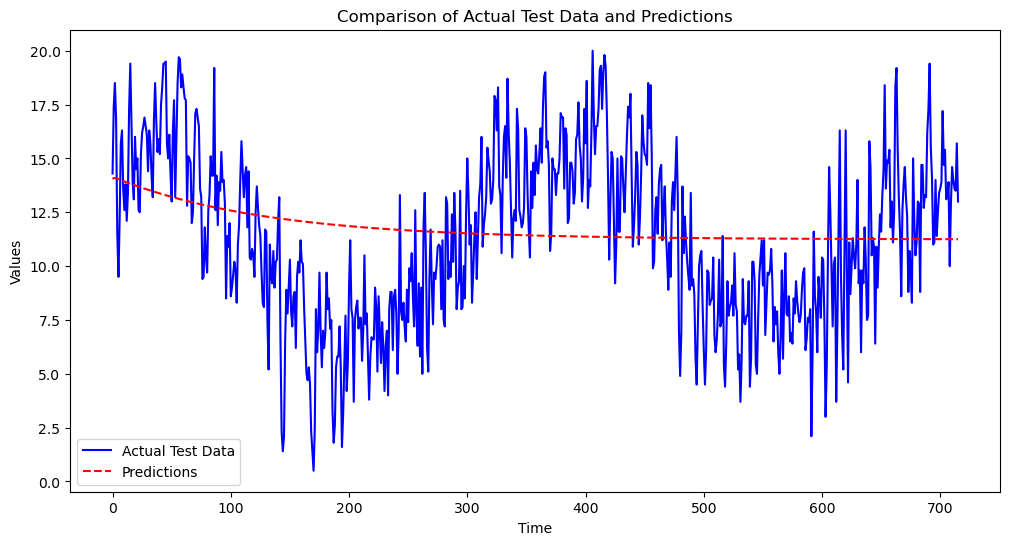

In [51]:
# Plotting the predictions for test data
plt.figure(figsize=(12, 6))
plt.plot(test.reset_index(drop=True), label='Actual Test Data', color='blue')
plt.plot(test_predictions.reset_index(drop=True), label='Predictions', color='red', linestyle='--')
plt.title('Comparison of Actual Test Data and Predictions')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

## 7. Prophet Model

In [52]:
# Create df_reset to fit the prophet model, change column name min_temp to y
df_reset = df.rename(columns={'date': 'ds', 'min_temp': 'y'})

# Rename 'Date' column to 'ds' to fit Prophet's expected column name
df_reset = df_reset.rename(columns={'Date': 'ds'})
df_reset

,ds,y,day,week,month,year,season
date,,,,,,,
1981-01-02,1/2/1981,17.9,2,1,1,1981,3
1981-01-03,1/3/1981,18.8,3,1,1,1981,3
1981-01-04,1/4/1981,14.6,4,1,1,1981,3
1981-01-05,1/5/1981,15.8,5,2,1,1981,3
1981-01-06,1/6/1981,15.8,6,2,1,1981,3
...,...,...,...,...,...,...,...
1990-12-27,12/27/1990,14.0,27,52,12,1990,3
1990-12-28,12/28/1990,13.6,28,52,12,1990,3
1990-12-29,12/29/1990,13.5,29,52,12,1990,3


In [53]:
from prophet import Prophet
# Split the reset dataset
p_train, p_test = train_test_split(df_reset, test_size=0.2, shuffle=False)

# Initialize the Prophet model
model = Prophet()

# Fit the model with the DataFrame
model.fit(p_train)

15:03:40 - cmdstanpy - INFO - Chain [1] start processing
15:03:40 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
# Create a future DataFrame for prediction dates
future = model.make_future_dataframe(periods=len(p_test))

# Predict future values
forecast = model.predict(future)

In [55]:
# Extract the predicted and actual values
y_pred = forecast['yhat'][-len(p_test):]  # Last 'len(p_test)' predictions
y_true = p_test['y'].values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f'RMSE: {rmse}')

RMSE: 2.688843085017298


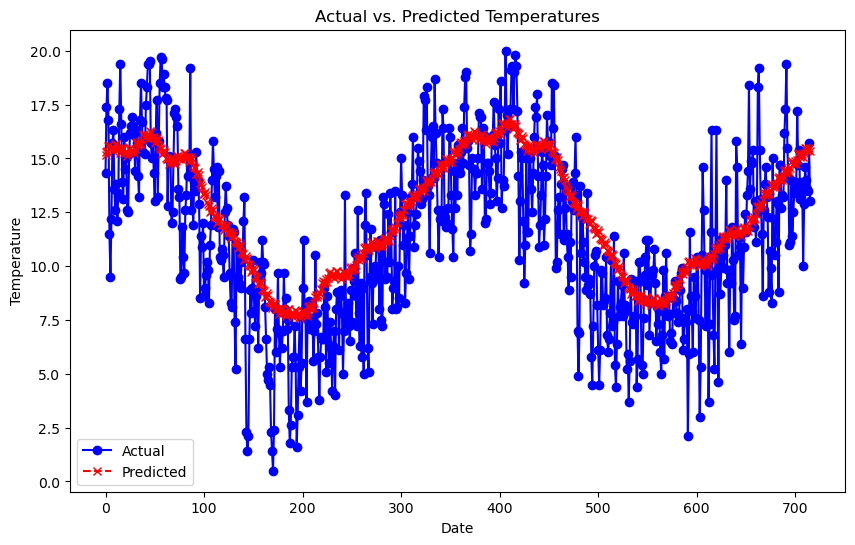

In [56]:
# Plot the results for test set
y_pred = y_pred.values
plt.figure(figsize=(10, 6))
plt.plot(y_true, label='Actual', color='blue', marker='o')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--', marker='x')
plt.title('Actual vs. Predicted Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

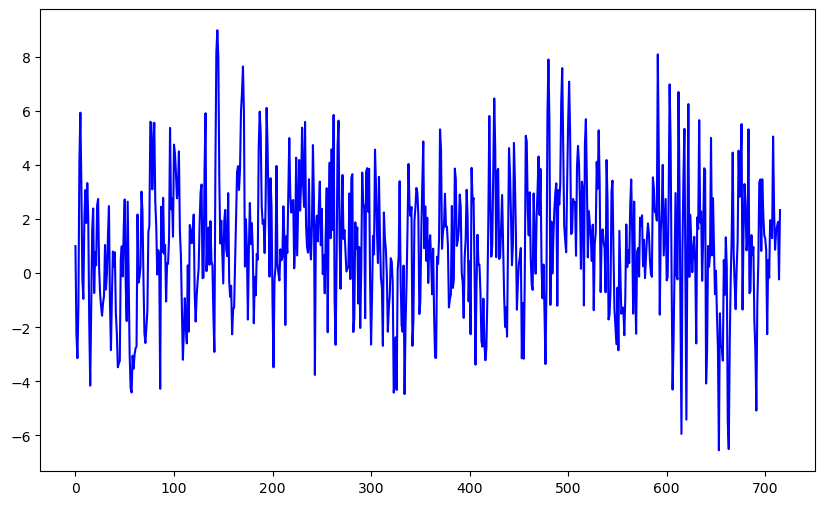

In [57]:
# Residuals plot
residuals = y_pred - y_true
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.show()

<AxesSubplot:ylabel='Count'>

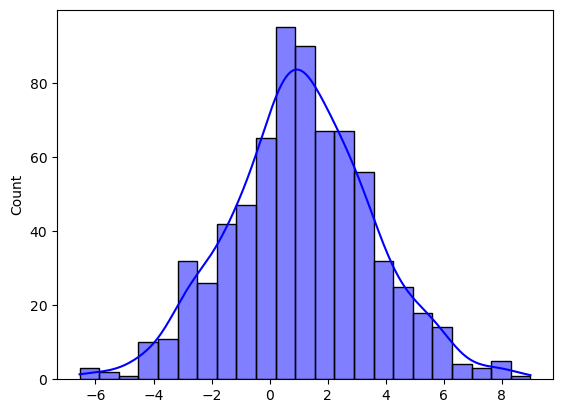

In [58]:
# Histogrm of residuals
sns.histplot(
    data = residuals,
    kde = True,
    color = 'blue'
)

## 9. Cyclical encoding

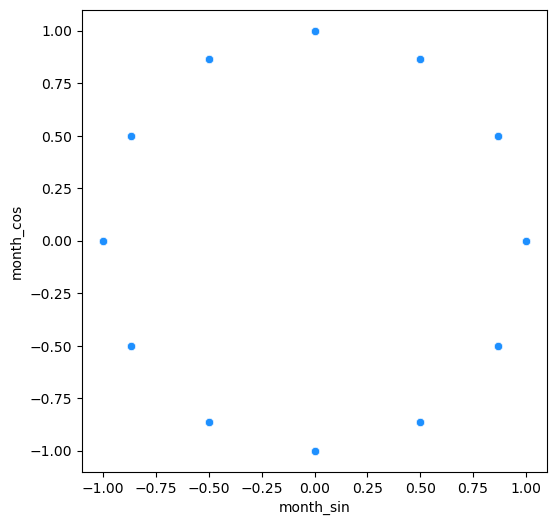

In [59]:
# Assuming df is DataFrame
df_copy = df.copy()

# Adding sine and cosine components
df_copy['month_sin'] = np.sin(2*np.pi*df_copy['month']/12)
df_copy['month_cos'] = np.cos(2*np.pi*df_copy['month']/12)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.scatterplot(x=df_copy.month_sin, y=df_copy.month_cos, color='dodgerblue')
plt.show()

# df['month_sin'] = np.sin(2*np.pi*df['month']/12)
# df['month_cos'] = np.cos(2*np.pi*df['month']/12)
# f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
# sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
# plt.show()

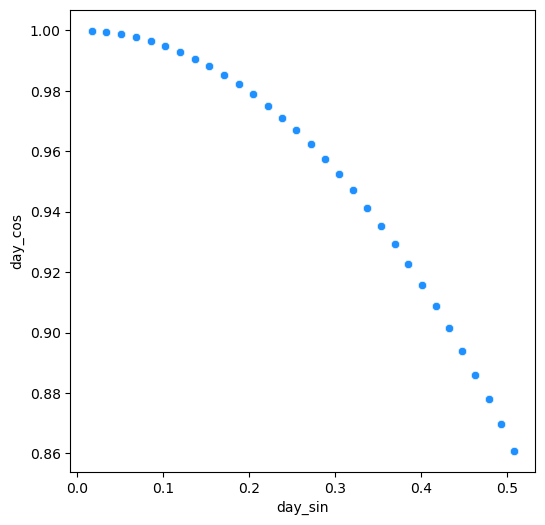

In [60]:
df_copy['day_sin'] = np.sin(2*np.pi*df['day']/365)
df_copy['day_cos'] = np.cos(2*np.pi*df['day']/365)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.scatterplot(x=df_copy.day_sin, y=df_copy.day_cos, color='dodgerblue')
plt.show()

# df['day_sin'] = np.sin(2*np.pi*df['day']/365)
# df['day_cos'] = np.cos(2*np.pi*df['day']/365)
# f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
# sns.scatterplot(x=df.day_sin, y=df.day_cos, color='dodgerblue')
# plt.show()

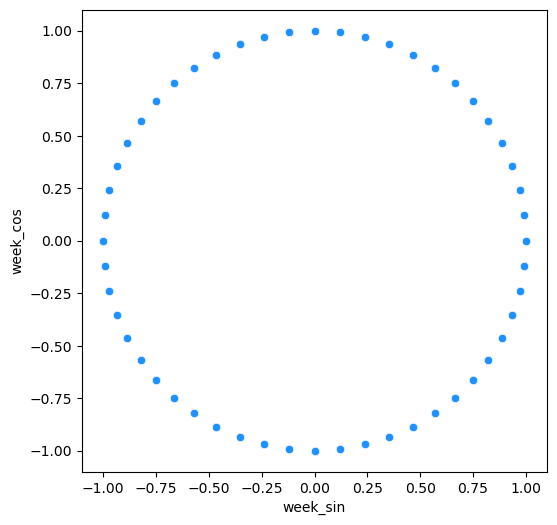

In [61]:
df_copy['week_sin'] = np.sin(2*np.pi*df['week']/52)
df_copy['week_cos'] = np.cos(2*np.pi*df['week']/52)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.scatterplot(x=df_copy.week_sin, y=df_copy.week_cos, color='dodgerblue')
plt.show()

# df['week_sin'] = np.sin(2*np.pi*df['week']/52)
# df['week_cos'] = np.cos(2*np.pi*df['week']/52)
# f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
# sns.scatterplot(x=df.week_sin, y=df.week_cos, color='dodgerblue')
# plt.show()

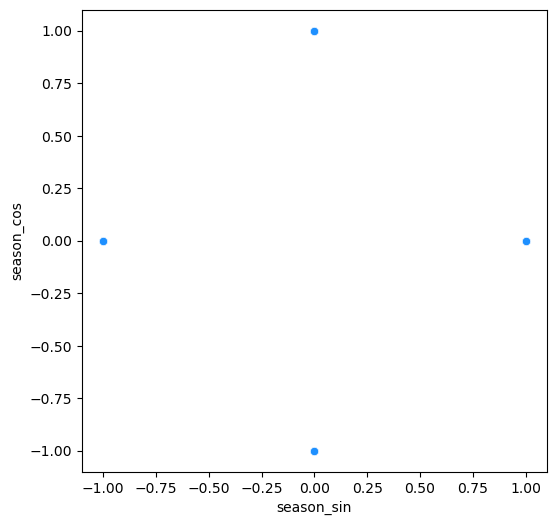

In [62]:
df_copy['season_sin'] = np.sin(2*np.pi*df['season']/4)
df_copy['season_cos'] = np.cos(2*np.pi*df['season']/4)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
sns.scatterplot(x=df_copy.season_sin, y=df_copy.season_cos, color='dodgerblue')
plt.show()

# df['season_sin'] = np.sin(2*np.pi*df['season']/4)
# df['season_cos'] = np.cos(2*np.pi*df['season']/4)
# f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
# sns.scatterplot(x=df.season_sin, y=df.season_cos, color='dodgerblue')
# plt.show()

In [63]:
df_copy.head()

# df.head()

,Date,min_temp,day,week,month,year,season,month_sin,month_cos,day_sin,day_cos,week_sin,week_cos,season_sin,season_cos
date,,,,,,,,,,,,,,,
1981-01-02,1/2/1981,17.9,2,1,1,1981,3,0.5,0.866025,0.034422,0.999407,0.120537,0.992709,-1.0,-1.836970e-16
1981-01-03,1/3/1981,18.8,3,1,1,1981,3,0.5,0.866025,0.051620,0.998667,0.120537,0.992709,-1.0,-1.836970e-16
1981-01-04,1/4/1981,14.6,4,1,1,1981,3,0.5,0.866025,0.068802,0.997630,0.120537,0.992709,-1.0,-1.836970e-16
1981-01-05,1/5/1981,15.8,5,2,1,1981,3,0.5,0.866025,0.085965,0.996298,0.239316,0.970942,-1.0,-1.836970e-16
1981-01-06,1/6/1981,15.8,6,2,1,1981,3,0.5,0.866025,0.103102,0.994671,0.239316,0.970942,-1.0,-1.836970e-16


In [64]:
df_copy.drop(['Date','day', 'week', 'month', 'season'], axis=1, inplace=True)

# df_copy.drop(['Date','day', 'week', 'month', 'season'], axis=1, inplace=True)

In [73]:
df_copy.head()

# df.head()

,min_temp,year,month_sin,month_cos,day_sin,day_cos,week_sin,week_cos,season_sin,season_cos
date,,,,,,,,,,
1981-01-02,17.9,1981,0.5,0.866025,0.034422,0.999407,0.120537,0.992709,-1.0,-1.836970e-16
1981-01-03,18.8,1981,0.5,0.866025,0.051620,0.998667,0.120537,0.992709,-1.0,-1.836970e-16
1981-01-04,14.6,1981,0.5,0.866025,0.068802,0.997630,0.120537,0.992709,-1.0,-1.836970e-16
1981-01-05,15.8,1981,0.5,0.866025,0.085965,0.996298,0.239316,0.970942,-1.0,-1.836970e-16
1981-01-06,15.8,1981,0.5,0.866025,0.103102,0.994671,0.239316,0.970942,-1.0,-1.836970e-16


## 10. LSTM

In [66]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        # Find the end of this pattern
        end_ix = i + n_steps
        # Check if we are beyond the dataset
        if end_ix > len(data)-1:
            break
        # Gather input and output parts of the pattern
        seq_x, seq_y = data[i:end_ix, 0:], data[end_ix, 0]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [74]:
# Creating sequences for LSTM
# data = df.values
data = df_copy.values
n_steps = 365
X, y = create_sequences(data, n_steps)

print(X.shape)
print(y.shape)

(3211, 365, 10)
(3211,)


In [75]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [78]:
# Convert the training and testing datasets to float32 type to improve computational efficiency
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [79]:
# Import necessary modules for building the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Define the number of features, time steps, and optimizer settings for the LSTM model
num_features = 10  
num_time_steps = 365  #1 year
optimizer = Adam(learning_rate=0.0003)

# Defining and compiling the LSTM model
model = Sequential()

# LSTM layers
model.add(LSTM(128, return_sequences=True, input_shape=(num_time_steps, num_features)))
model.add(LSTM(64, return_sequences=False))

# Dense layers
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  
model.compile(optimizer=optimizer, loss='mse')

# Training the model
model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100

65/65 [==============================] - 25s 327ms/step - loss: 84.7897 - val_loss: 62.7224
Epoch 2/100
65/65 [==============================] - 20s 306ms/step - loss: 24.4689 - val_loss: 18.2697
Epoch 3/100
65/65 [==============================] - 20s 304ms/step - loss: 14.6821 - val_loss: 14.9230
Epoch 4/100
65/65 [==============================] - 20s 302ms/step - loss: 14.6299 - val_loss: 15.1055
Epoch 5/100
65/65 [==============================] - 20s 305ms/step - loss: 14.6343 - val_loss: 14.7847
Epoch 6/100
65/65 [==============================] - 20s 307ms/step - loss: 14.6257 - val_loss: 14.9838
Epoch 7/100
65/65 [==============================] - 20s 309ms/step - loss: 14.6268 - val_loss: 14.7598
Epoch 8/100
65/65 [==============================] - 20s 307ms/step - loss: 14.6283 - val_loss: 14.7070
Epoch 9/100
65/65 [==============================] - 20s 311ms/step - loss: 14.6374 - val_loss: 14.8000
Epoch 10/100
65/65 [==============================] - 15s 237ms

65/65 [==============================] - 10s 158ms/step - loss: 7.0045 - val_loss: 6.9131
Epoch 74/100
65/65 [==============================] - 10s 159ms/step - loss: 7.1717 - val_loss: 6.1367
Epoch 75/100
65/65 [==============================] - 10s 158ms/step - loss: 6.9785 - val_loss: 6.3039
Epoch 76/100
65/65 [==============================] - 10s 159ms/step - loss: 6.8562 - val_loss: 5.9714
Epoch 77/100
65/65 [==============================] - 10s 160ms/step - loss: 7.0174 - val_loss: 8.9041
Epoch 78/100
65/65 [==============================] - 10s 159ms/step - loss: 7.0802 - val_loss: 6.1700
Epoch 79/100
65/65 [==============================] - 10s 158ms/step - loss: 6.9959 - val_loss: 6.4067
Epoch 80/100
65/65 [==============================] - 10s 158ms/step - loss: 6.8703 - val_loss: 6.2908
Epoch 81/100
65/65 [==============================] - 10s 159ms/step - loss: 6.8229 - val_loss: 6.4963
Epoch 82/100
65/65 [==============================] - 10s 158ms/step - loss: 6.7883 - 

In [80]:
# Calculating MSE and printing RMSE for training data
y = model.predict(X_train)
mse = mean_squared_error(y_train, y) 
rmse = sqrt(mse)
print("RMSE:", rmse)

81/81 [==============================] - 6s 63ms/step
RMSE: 2.5631428354196695


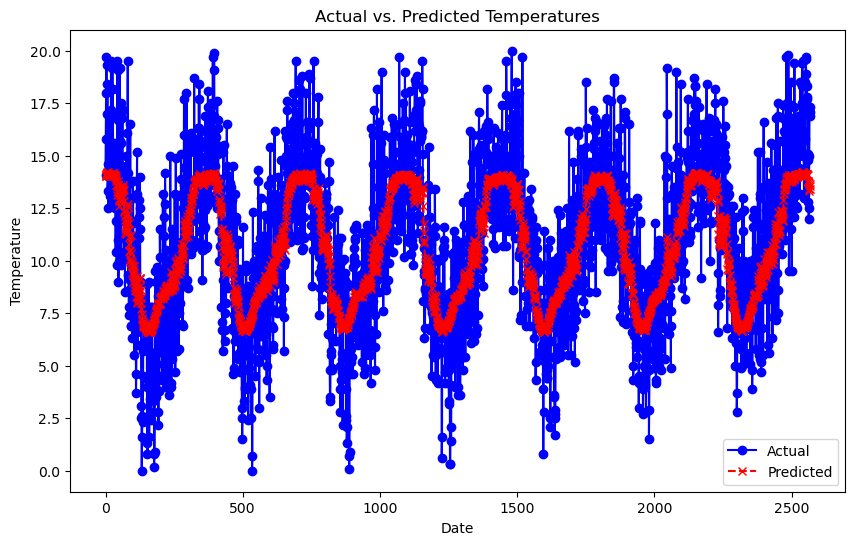

In [81]:
# Plotting the results for training data
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual', color='blue', marker='o')
plt.plot(y, label='Predicted', color='red', linestyle='--', marker='x')
plt.title('Actual vs. Predicted Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [82]:
# Predicting on the test set
y_pred = model.predict(X_test) 

# Calculating MSE and printing RMSE for test data
mse = mean_squared_error(y_test, y_pred) 
rmse = sqrt(mse)
print("RMSE:", rmse)

21/21 [==============================] - 1s 62ms/step
RMSE: 2.4415619091002463


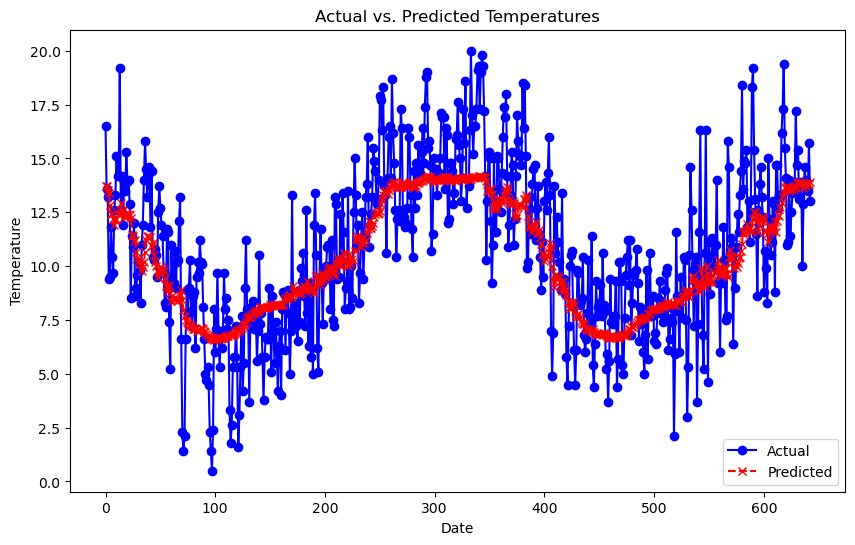

In [83]:
# Plotting the results for test data
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue', marker='o')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--', marker='x')
plt.title('Actual vs. Predicted Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

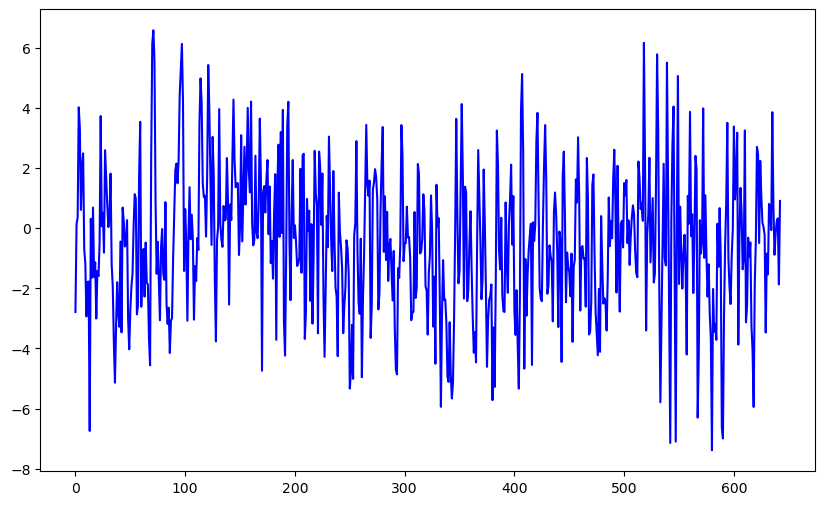

In [84]:
# Flattening y_pred for further analysis
y_pred = y_pred.flatten()

# Plotting residuals
residuals = y_pred - y_test
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.show()

<AxesSubplot:ylabel='Count'>

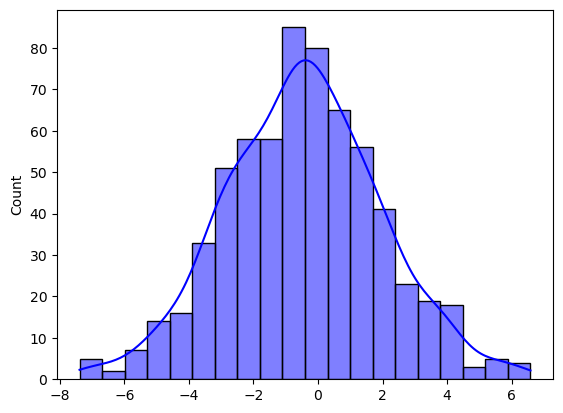

In [85]:
# Plotting histogram of residuals
sns.histplot(
    data = residuals,
    kde = True,
    color = 'blue'
)